In [1]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Group

Zander Edmond & Abigail Kubli

## Cleaning Data

In [2]:
teamStats = pd.read_csv('team_stats_2003_2023.csv')

### Checking for Duplicates

In [3]:
len(teamStats)-len(teamStats.drop_duplicates())
# No duplicates

0

### Removing Column
The `ties` column has some NaN values. It think it's safe to remove it as it doesn't affect any of ourr research questions.

In [4]:
teamStats.drop('ties', axis=1,inplace=True)

### Fill NaN values
The `mov` column has some NaN values. Replaced NaN values with `point_diff/g`

In [5]:
teamStats.mov = teamStats.mov.fillna((teamStats.points_diff / teamStats.g).round(1))

## Creating the Data Structures

### List

In [6]:
# 2003–2006
team2003 = teamStats[0:128]  # row-based slice
list2003 = team2003[['year', 'team', 'win_loss_perc', 'turnovers']].values.tolist()

# 2007–2010
team2007 = teamStats[128:256]
list2007 = team2007[['year', 'team', 'win_loss_perc', 'turnovers']].values.tolist()

# 2011–2014
team2011 = teamStats[256:384]
list2011 = team2011[['year', 'team', 'win_loss_perc', 'turnovers']].values.tolist()

# 2015–2018
team2015 = teamStats[384:512]
list2015 = team2015[['year', 'team', 'win_loss_perc', 'turnovers']].values.tolist()

# 2019–2023
team2019 = teamStats[512:672]
list2019 = team2019[['year', 'team', 'win_loss_perc', 'turnovers', 'wins', 'g']].values.tolist()

### Arrays

In [7]:
# Years 2003-2006
team2003 = teamStats[0:128]
arr2003 = np.array(team2003.year, dtype=object)
arr2003 = np.column_stack((arr2003, team2003.team, team2003.win_loss_perc, team2003.rush_yds_per_att, team2003.pass_net_yds_per_att))

# Years 2007–2010
team2007 = teamStats[128:256]
arr2007 = np.array(team2007.year, dtype=object)
arr2007 = np.column_stack((arr2007, team2007.team, team2007.win_loss_perc, team2007.rush_yds_per_att, team2007.pass_net_yds_per_att))

# Years 2011–2014
team2011 = teamStats[256:384]
arr2011 = np.array(team2011.year, dtype=object)
arr2011 = np.column_stack((arr2011, team2011.team, team2011.win_loss_perc, team2011.rush_yds_per_att, team2011.pass_net_yds_per_att))

# Years 2015–2018
team2015 = teamStats[384:512]
arr2015 = np.array(team2015.year, dtype=object)
arr2015 = np.column_stack((arr2015, team2015.team, team2015.win_loss_perc, team2015.rush_yds_per_att, team2015.pass_net_yds_per_att))

# Years 2019–2023
team2019 = teamStats[384:672]
arr2019 = np.array(team2019.year, dtype=object)
arr2019 = np.column_stack((arr2019, team2019.team, team2019.win_loss_perc, team2019.rush_yds_per_att, team2019.pass_net_yds_per_att))

## Research Question 1:

### How do turnovers, including fumbles and interceptions, impact a teams win percentage?

In [8]:
def plotTurnoversScatter(win_pct, turnovers, years_label):
    fig, ax = plt.subplots(figsize=(7, 5))

    x = np.array(turnovers, dtype=float)
    y = np.array(win_pct, dtype=float)

    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    # Scatter
    ax.scatter(x, y, color='cornflowerblue', alpha=0.7, label='Team Seasons')

  
    if len(x) > 1 and np.std(x) > 0 and np.std(y) > 0:
        coef = np.polyfit(x, y, 1)
        p = np.poly1d(coef)

        # Plot line
        x_line = np.linspace(x.min(), x.max(), 100)
        ax.plot(x_line, p(x_line), color='orange', linewidth=2, label='Linear Fit')

        # Compute R^2
        corr = np.corrcoef(x, y)[0, 1]
        r2 = corr**2
        r2_text = f"$R^2 = {r2:.2f}$"
    else:
        r2_text = "R^2 = N/A"


    ax.annotate(
        r2_text,
        xy=(0.03, 0.92), xycoords='axes fraction',
        fontsize=12,
        bbox=dict(facecolor='lightgray', alpha=0.6, boxstyle='round,pad=0.3')
    )

    ax.set_title(f"Total Turnovers vs Win% ({years_label})")
    ax.set_xlabel("Total Turnovers")
    ax.set_ylabel("Win Percentage")
    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    plt.show()


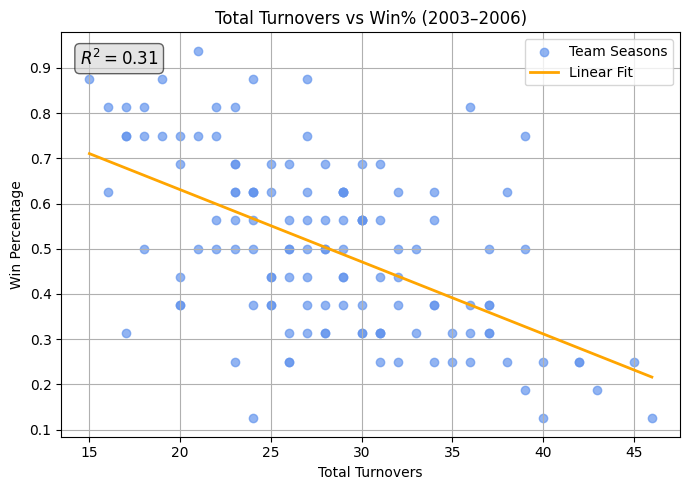

In [9]:
winpct_2003 = [row[2] for row in list2003]
turn_2003 = [row[3] for row in list2003]
plotTurnoversScatter(winpct_2003, turn_2003, "2003–2006")

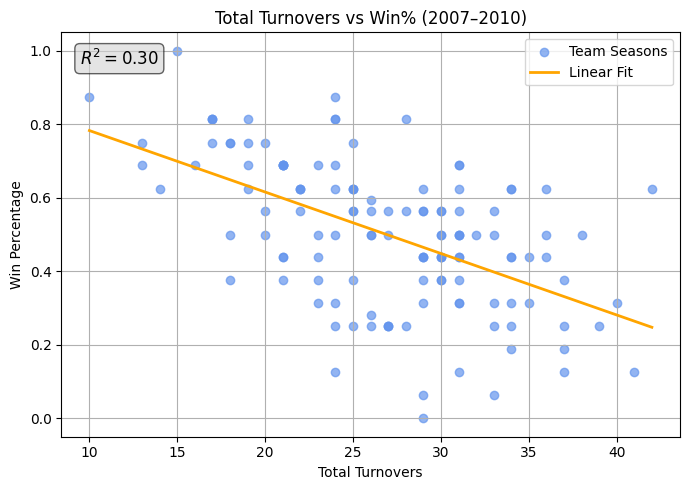

In [10]:
winpct_2007 = [row[2] for row in list2007]
turn_2007 = [row[3] for row in list2007]
plotTurnoversScatter(winpct_2007, turn_2007, "2007–2010")

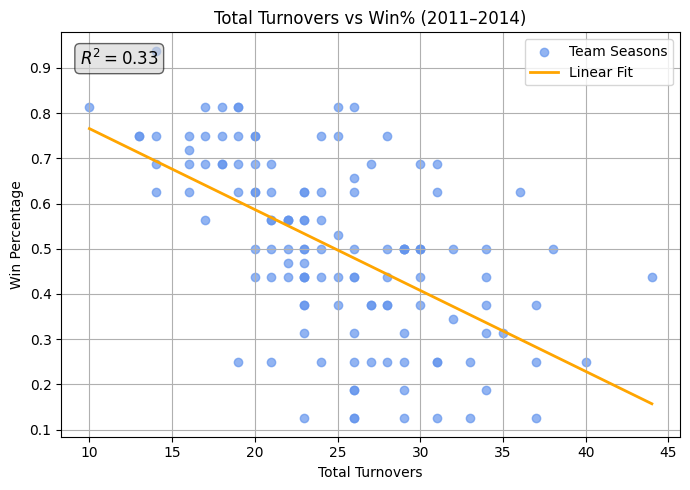

In [11]:
winpct_2011 = [row[2] for row in list2011]
turn_2011 = [row[3] for row in list2011]
plotTurnoversScatter(winpct_2011, turn_2011, "2011–2014")

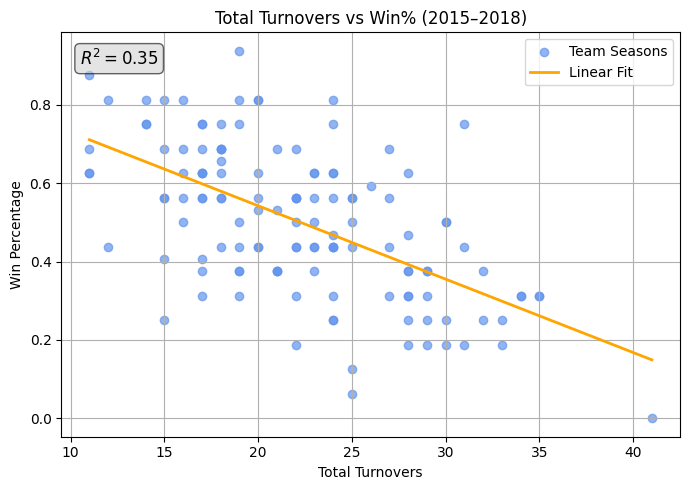

In [12]:
winpct_2015 = [row[2] for row in list2015]
turn_2015 = [row[3] for row in list2015]
plotTurnoversScatter(winpct_2015, turn_2015, "2015–2018")

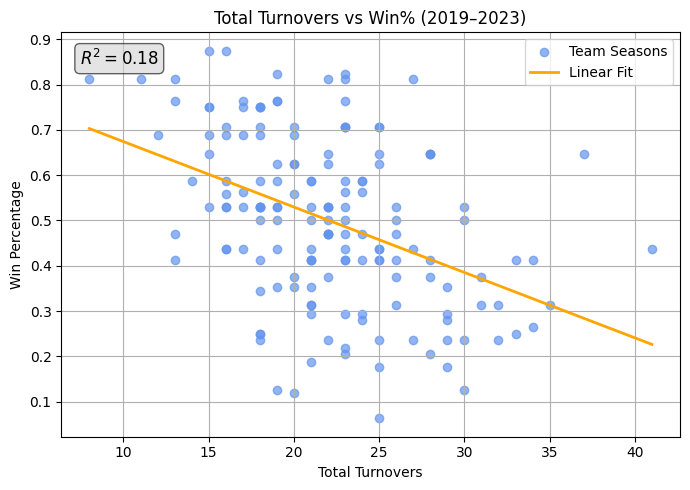

In [13]:
winpct_2019 = [row[2] for row in list2019]
turn_2019 = [row[3] for row in list2019]
plotTurnoversScatter(winpct_2019, turn_2019, "2019–2023")

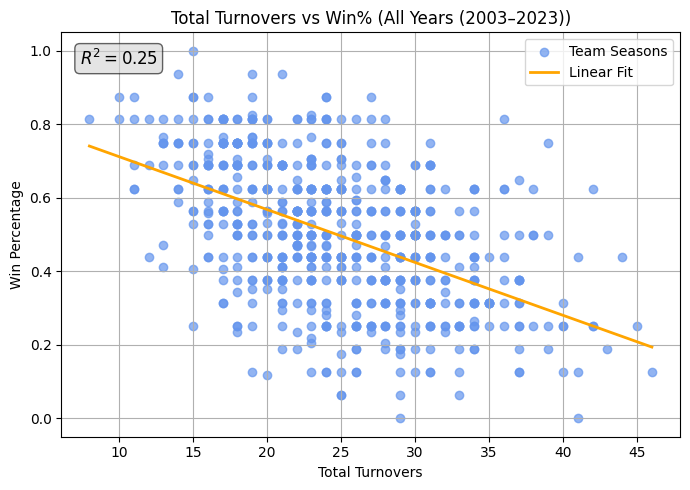

In [14]:
all_years_list = list2003 + list2007 + list2011 + list2015 + list2019

winpct_all = [row[2] for row in all_years_list]
turn_all = [row[3] for row in all_years_list]

plotTurnoversScatter(winpct_all, turn_all, "All Years (2003–2023)")


## Research Question 2:


### How does rushing yards per attempt impact the win percentage compared to passing yards per attempt?

In [15]:
def plotScatter(y,x1,x2, years):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Perform linear fit
    coefficients = np.polyfit(x1, y, 1)
    p1 = np.poly1d(coefficients)

    #r-squared
    correlation = np.corrcoef(x1, y)[0,1]
    ax1.annotate(f'$R^2 = {correlation**2:.2f}$', xy=(0.013, 0.938), fontsize=13, color='black', xycoords='axes fraction',
            bbox=dict(facecolor='orange', alpha=0.5, boxstyle='round,pad=0.3'))

    #displaying data
    ax1.plot(x1, p1(x1), label='Linear Fit', color='orange')
    ax1.scatter(x1, y, color='cornflowerblue', label='Rushing Data')
    ax1.set_title('Win Loss Percentage VS. Rush Yards per Attempt')
    ax1.set_xlabel('Rushing Yards per Attempt')
    ax1.set_ylabel('Win Loss Percentage')
    ax1.legend()
    ax1.grid(True)

    # Perform linear fit
    coefficients = np.polyfit(x2, y, 1)
    p2 = np.poly1d(coefficients)

    #r-squared
    correlation = np.corrcoef(x2, y)[0,1]
    ax2.annotate(f'$R^2 = {correlation**2:.2f}$', xy=(0.013, 0.938), fontsize=13, color='black', xycoords='axes fraction',
            bbox=dict(facecolor='cornflowerblue', alpha=0.5, boxstyle='round,pad=0.3'))

    #displaying data
    ax2.plot(x2, p2(x2), label='Linear Fit', color='cornflowerblue')
    ax2.scatter(x2, y, color='orange', label='Passing Data')
    ax2.set_title('Win Loss Percentage VS. Pass Yards per Attempt')
    ax2.set_xlabel('Pass Yards per Attempt')
    ax2.set_ylabel('Win Loss Percentage')
    ax2.legend()
    ax2.grid(True)

    fig.suptitle(years, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.legend()
    plt.show()

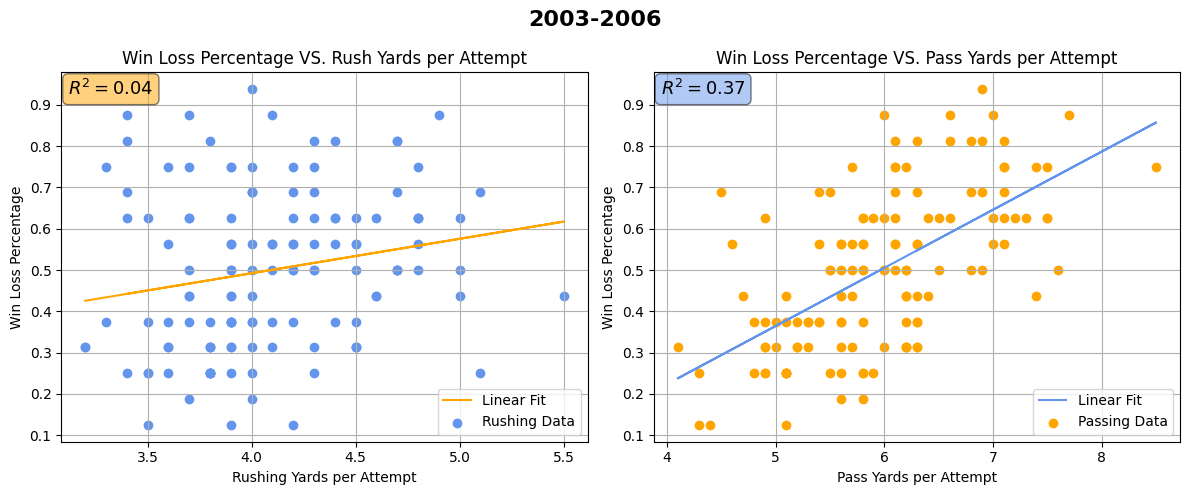

In [16]:
y = arr2003[:,2].astype(np.float64)
x1 = arr2003[:,3].astype(np.float64)
x2 = arr2003[:,4].astype(np.float64)

plotScatter(y,x1,x2,'2003-2006')

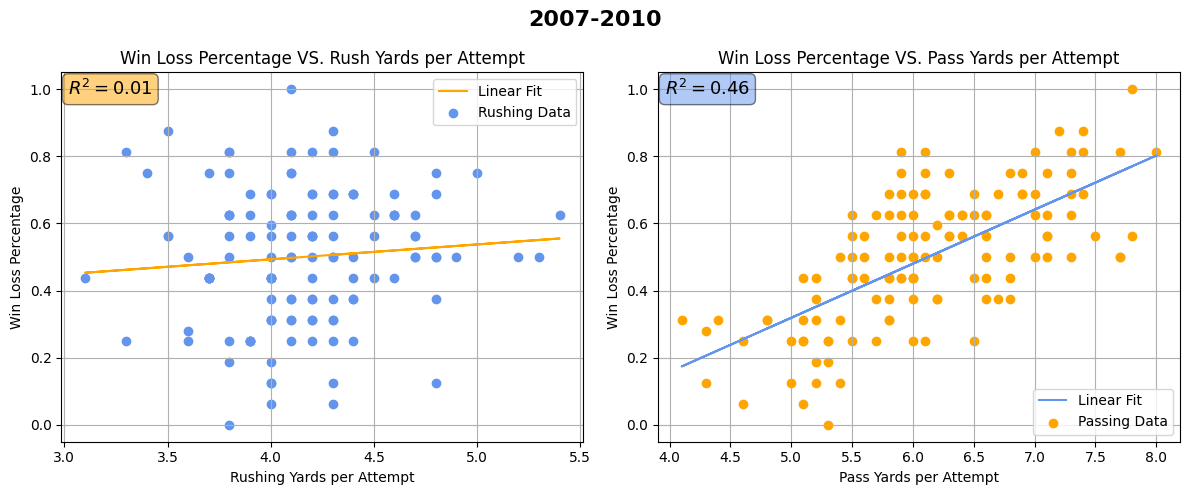

In [17]:
y = arr2007[:,2].astype(np.float64)
x1 = arr2007[:,3].astype(np.float64)
x2 = arr2007[:,4].astype(np.float64)

plotScatter(y,x1,x2,'2007-2010')

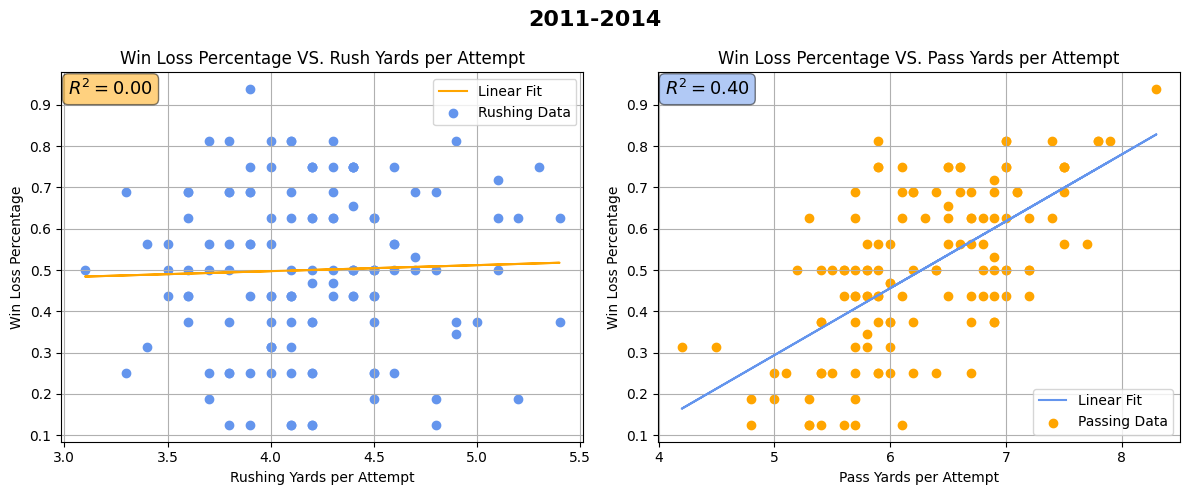

In [18]:
y = arr2011[:,2].astype(np.float64)
x1 = arr2011[:,3].astype(np.float64)
x2 = arr2011[:,4].astype(np.float64)

plotScatter(y,x1,x2, '2011-2014')

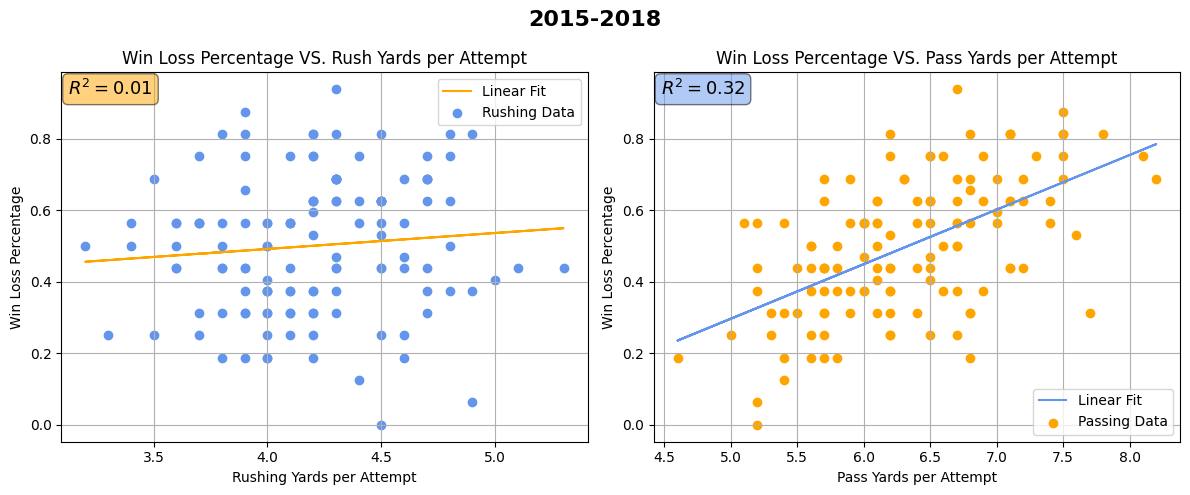

In [19]:
y = arr2015[:,2].astype(np.float64)
x1 = arr2015[:,3].astype(np.float64)
x2 = arr2015[:,4].astype(np.float64)

plotScatter(y,x1,x2, '2015-2018')

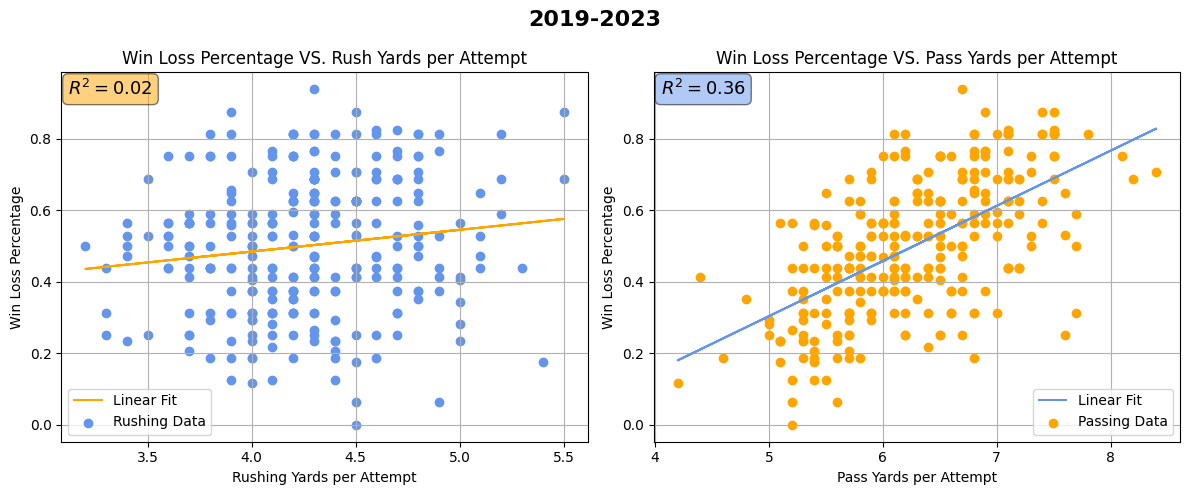

In [20]:
y = arr2019[:,2].astype(np.float64)
x1 = arr2019[:,3].astype(np.float64)
x2 = arr2019[:,4].astype(np.float64)

plotScatter(y,x1,x2, '2019-2023')